## Titanic dataset from Kaggle

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from IPython.display import display

In [2]:

training = "/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/train.csv"
testing = "/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/test.csv"
df_train = pd.read_csv(training)
df_test = pd.read_csv(testing)
display(df_train.head())
display(df_test.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Visualisation

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

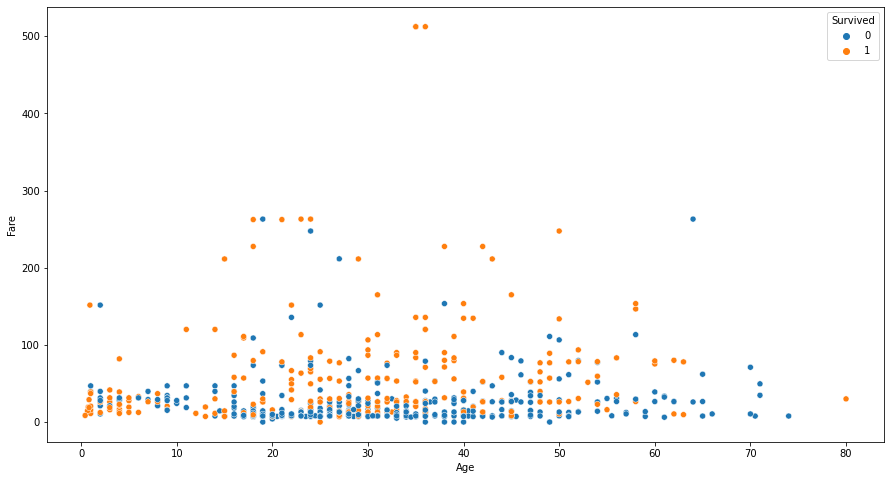

In [13]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df_train['Age'], df_train['Fare'], hue=df_train['Survived'])

plt.show()

/home/chinmayee/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


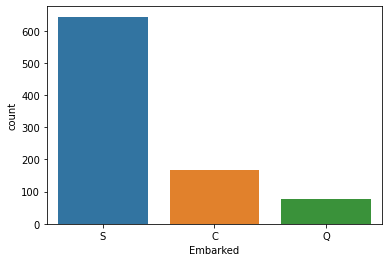

In [6]:
sns.countplot(df_train['Embarked'])
plt.show()

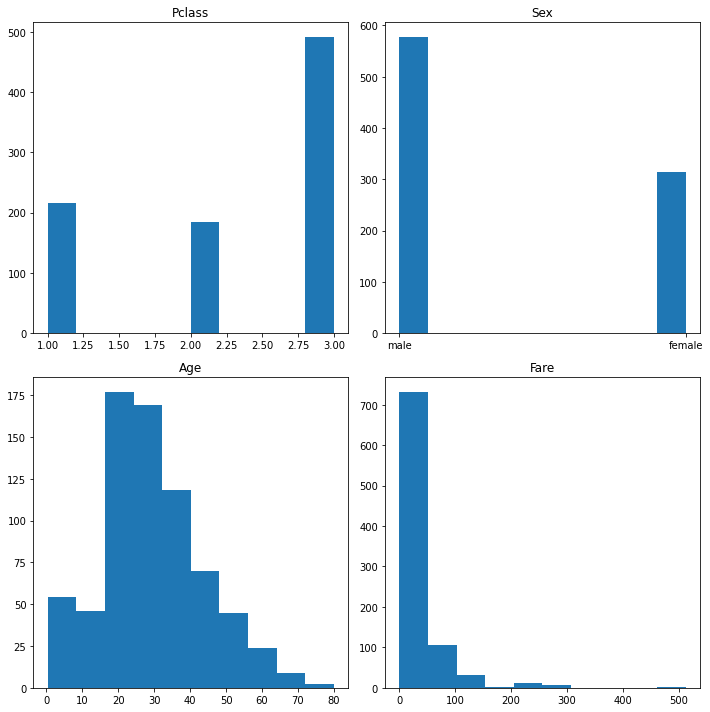

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
ax[0,0].hist(df_train['Pclass'])
ax[0,1].hist(df_train['Sex'])
ax[1,0].hist(df_train['Age'])
ax[1,1].hist(df_train['Fare'])

ax[0,0].title.set_text('Pclass')
ax[0,1].title.set_text('Sex')
ax[1,0].title.set_text('Age')
ax[1,1].title.set_text('Fare')
plt.show()

# Preprocessing
0. remove unnecessary columns
1. Null value handle
2. string value handle
3. train test split
4. standardization / normalization

### Removing unnecessary columns

In [8]:
X = df_train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis =1)
y = df_train['Survived']
X_t = df_test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)
X = pd.get_dummies(X)
X_t = pd.get_dummies(X_t)
display(X, X_t, y)
             


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,1,0,0,1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_ = sc.fit_transform(X)
X_test =sc.transform(X_t)


### Train_Val splitting

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size= 0.33, random_state= 1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
decision_tree.fit(X_, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
Y_pred = decision_tree.predict(X_test)
Y_pred

# Modeling

In [ ]:
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring = 'accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_train,y_train)

y_pred = result.predict(X_val)
print('Best Hyperparameters: %s' % result.best_params_)




# Prediction